In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("C:/Users/Hp/Downloads/advertising.csv")

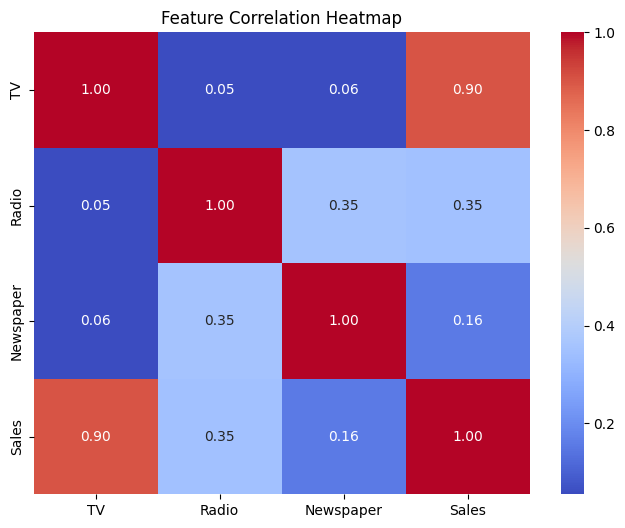

In [3]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")  
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
x = df.drop("Sales", axis=1)  # Features (TV, Radio, Newspaper)
y = df["Sales"]  # Target variable


In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"{LinearRegression} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}")


<class 'sklearn.linear_model._base.LinearRegression'> - MSE: 2.91, RMSE: 1.71, R² Score: 0.91


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = mean_squared_error(y_test, y_pred1, squared=False)
r21 = r2_score(y_test, y_pred1)
print(f"{RandomForestRegressor} - MSE: {mse1 :.2f}, RMSE: {rmse1 :.2f}, R² Score: {r21 :.2f}")


<class 'sklearn.ensemble._forest.RandomForestRegressor'> - MSE: 1.39, RMSE: 1.18, R² Score: 0.96


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_rf1 = grid_search.best_estimator_

# Predictions
y_pred_tuned = best_rf1.predict(X_test)

# Evaluate performance
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = mean_squared_error(y_test, y_pred_tuned, squared=False)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned RandomForestRegressor - MSE: {mse_tuned:.2f}, RMSE: {rmse_tuned:.2f}, R² Score: {r2_tuned:.2f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RandomForestRegressor - MSE: 2.95, RMSE: 1.72, R² Score: 0.90


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
336 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 

In [9]:
import pickle
with open("random_forest_sales_model_with_newspaper.pkl", "wb") as f:
    pickle.dump(best_rf1, f)
print("Model saved successfully")

with open("random_forest_sales_model_with_newspaper.pkl", "rb") as f:
    loaded_model = pickle.load(f)

sample_input = X_test.iloc[0].values.reshape(1, -1)
predicted_sales = loaded_model.predict(sample_input)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")


Model saved successfully
Predicted Sales: 17.64


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


C:\Users\Hp\AppData\Local\Temp\ipykernel_10508\256893325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


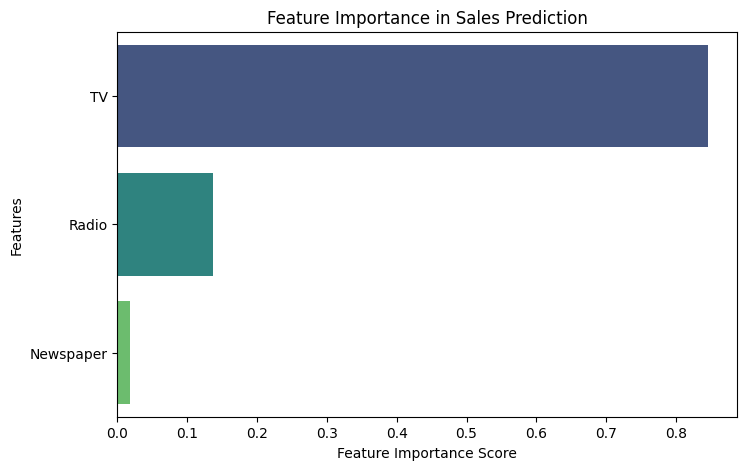

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Sales Prediction")
plt.show()


In [11]:
X_train_reduced = X_train.drop(columns=["Newspaper"])
X_test_reduced = X_test.drop(columns=["Newspaper"])

rf_model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred_reduced)
rmse = mean_squared_error(y_test, y_pred_reduced, squared=False)
r2 = r2_score(y_test, y_pred_reduced)
print(f"Random Forest Without Newspaper - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}")


Random Forest Without Newspaper - MSE: 1.24, RMSE: 1.11, R² Score: 0.96


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=1)
grid_search.fit(X_train_reduced, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train_reduced, y_train)
y_pred_best = best_rf.predict(X_test_reduced)
mse = mean_squared_error(y_test, y_pred_best)
rmse = mean_squared_error(y_test, y_pred_best, squared=False)
r2 = r2_score(y_test, y_pred_best)
print(f"Tuned Random Forest - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest - MSE: 1.22, RMSE: 1.10, R² Score: 0.96


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
import pickle
with open("random_forest_sales_model_without_newspaper.pkl", "wb") as f:
    pickle.dump(best_rf, f)
print("Model saved successfully")

with open("random_forest_sales_model_without_newspaper.pkl", "rb") as f:
    loaded_model = pickle.load(f)

sample_input = X_test_reduced.iloc[0].values.reshape(1, -1)
predicted_sales = loaded_model.predict(sample_input)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")


Model saved successfully
Predicted Sales: 17.53


c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
